# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


**Background**

- GoalZone is a fitness club chain in Canada.
- GoalZone offers a range of fitness classes in two capacities - 25 and 15.
- Some classes are always fully booked. Fully booked classes often have a low attendance rate.
- GoalZone wants to increase the number of spaces available for classes.
- They want to do this by predicting whether the member will attend the class or not.
- If they can predict a member will not attend the class, they can make another space available.

**Tasks**

1. For every column in the data:

a. State whether the values match the description given in the table.

b. State the number of missing values in the column.

c. Describe what you did to make values match the description if they did not match.

2. Create a visualization that shows how many bookings attended the class. Use the visualization to:

a. State which category of the variable attended has the most observations

b. Explain whether the observations are balanced across categories of the variable attended

3. Describe the distribution of the number of months as a member. Your answer must include a visualization that shows the distribution.

4. Describe the relationship between attendance and number of months as a member. Your answer must include a visualization to demonstrate the relationship.

5. The business wants to predict whether members will attend using the data provided. State the type of machine learning problem that this is (regression/ classification/clustering).

6. Fit a baseline model to predict whether members will attend using the data provided. You must include your code.

7. Fit a comparison model to predict whether members will attend using the data provided. You must include your code.

8. Explain why you chose the two models used in parts 6 and 7.

10. Compare the performance of the two models used in parts 6 and 7, using any method suitable. You must include your code.

10. Explain which model performs better and why.



## Task 1 
**For every column in the data:**

**a. State whether the values match the description given in the table.**

**b. State the number of missing values in the column.**

**c. Describe what you did to make values match the description if they did not match.**

The next table includes de original description of the data (column name and criteria) plus the **answers to questions a, b and c**.

| Column Name       | Criteria                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |match the criteria? What I did to match criteria? | Number of missing values |
|-------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------|--------------------------|
| booking_id        | Nominal. The unique identifier of the booking. Missing values are not possible due to the database structure.                                                                                                                                                                                                                                                                                                                                                                 | yes                 | 0                       |
| months_as_member  | Discrete. The number of months as this fitness club member, minimum 1 month. Replace missing values with the overall average month.                                                                                                                                                                                                                                                                                                                                            | yes                 | 0                       |
| weight            | Continuous. The member's weight in kg, rounded to 2 decimal places. The minimum possible value is 40.00 kg. Replace missing values with the overall average weight.                                                                                                                                                                                                                                                                                                                                 | yes                 | 20                       |
| days_before       | Discrete. The number of days before the class the member registered, minimum 1 day. Replace missing values with 0.                                                                                                                                                                                                                                                                                                                                                                 | Not all values match the criteria, some values have the string "days" in it, I remove the string, so for example if the value was "10 days" I leave 10                 | 0                       |
| day_of_week       | Ordinal. The day of the week of the class. One of “Mon”, “Tue”, “Wed”, “Thu”, “Fri”, “Sat” or “Sun”. Replace missing values with “unknown”.                                                                                                                                                                                                                                                                                                                                                  | Not all values match the criteria, some values have the string "Monday", "Fri." and "Wednesday", I replace this values for the criteria: "Mon", "Fri" and "Wed"                | 0                       |
| time              | Ordinal. The time of day of the class. Either “AM” or “PM”. Replace missing values with “unknown”.                                                                                                                                                                                                                                                                                                                                                                                 | yes                 | 0                       |
| category          | Nominal. The category of the fitness class. One of “Yoga”, “Aqua”, “Strength”, “HIIT”, or “Cycling”. Replace missing values with “unknown”.                                                                                                                                                                                                                                                                                                                                                  | There are some values that have "-" in it, I replace them for "unknown"                 | 13                       |
| attended          | Nominal. Whether the member attended the class (1) or not (0). Missing values should be removed.                                                                                                                                                                                                                                                                                                                                                                                                 | yes                 | 0                       |

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a dataframe
fitness_class = pd.read_csv("fitness_class_2212.csv")

# Print the first 5 rows of the dataframe
print(fitness_class.head())

# Print information about the dataframe
print(fitness_class.info())

# check the columns in the dataframe
print(fitness_class.columns)

# check the data types of the columns in the dataframe
print(fitness_class.dtypes)

# check for missing values in the columns of the dataframe
print(fitness_class.isnull().sum())


   booking_id  months_as_member  weight  ... time  category attended
0           1                17   79.56  ...   PM  Strength        0
1           2                10   79.01  ...   AM      HIIT        0
2           3                16   74.53  ...   AM  Strength        0
3           4                 5   86.12  ...   AM   Cycling        0
4           5                15   69.29  ...   AM      HIIT        0

[5 rows x 8 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-nul

In [35]:
# calculate the overall average weight
average_weight = fitness_class['weight'].mean()
print(average_weight)

# replace the missing values in the 'weight' column with the overall average weight
fitness_class['weight'] = fitness_class['weight'].fillna(average_weight)


#############################################

# remove the string 'days' from the 'days_before' column
fitness_class['days_before'] = fitness_class['days_before'].replace(to_replace=' days', value='', regex=True)

# convert the 'days_before' column to int
fitness_class['days_before'] = fitness_class['days_before'].astype(int)

#################################################

# replace values in the 'day_of_week' column
fitness_class['day_of_week'] = fitness_class['day_of_week'].replace({'Wednesday': 'Wed', 'Fri.': 'Fri', 'Monday': 'Mon'})

###################################################

# replace '-' with 'unknown' in the 'category' column
fitness_class['category'] = fitness_class['category'].replace({'-': 'unknown'})

82.61037837837839


In [36]:
# Get the count of each unique value in the "category" column
value_counts = fitness_class["attended"].value_counts()
print(value_counts)

# Print information about the dataframe
print(fitness_class.info())

0    1046
1     454
Name: attended, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1500 non-null   float64
 3   days_before       1500 non-null   int64  
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 93.9+ KB
None


## Task 2
**Create a visualization that shows how many bookings attended the class. Use the visualization to:**

**a. State which category of the variable attended has the most observations:**

It can be stated from the next figures and table that:

- The variable *attended*, shows that **69.7% of people did not attend (value 0)** the booked class and **30.3% did attend (value 1)** the booked class. This shows that a large percentage of people book a class and end up not going to the class, this is consistent with the background given by the company Goalzone.
- The variable *attended* in relationship with the variable *category* also shows that **in general more than 70% of the people that book a class for any category dont attend**.

**b. Explain whether the observations are balanced across categories of the variable attended:**

It can be stated from the next figures and table that the observations are not balanced across caterories of the variable attended, because there are more observations for the "non-attended" value than for the "attended" such is the differente that **in general more than 70% of the people that book a class for any category dont attend**.

![image-3](image-3.png)

![image-4](image-4.png)

![image-5](image-5.png)

| category | attended | Counts | Percentage |
|----------|----------|--------|------------|
| Aqua     | 0        | 51     | 67.105263  |
| Aqua     | 1        | 25     | 32.894737  |
| Cycling  | 0        | 266    | 70.744681  |
| Cycling  | 1        | 110    | 29.255319  |
| HIIT     | 0        | 454    | 68.065967  |
| HIIT     | 1        | 213    | 31.934033  |
| Strength | 0        | 171    | 73.390558  |
| Strength | 1        | 62     | 26.609442  |
| Yoga     | 0        | 93     | 68.888889  |
| Yoga     | 1        | 42     | 31.111111  |
| unknown  | 0        | 11     | 84.615385  |
| unknown  | 1        | 2      | 15.384615  |

![image-7](image-7.png)


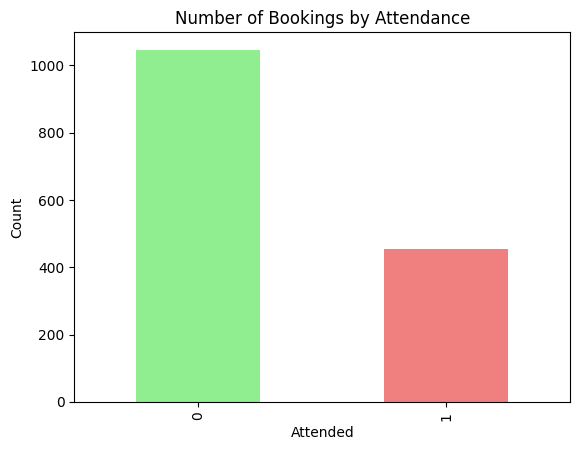

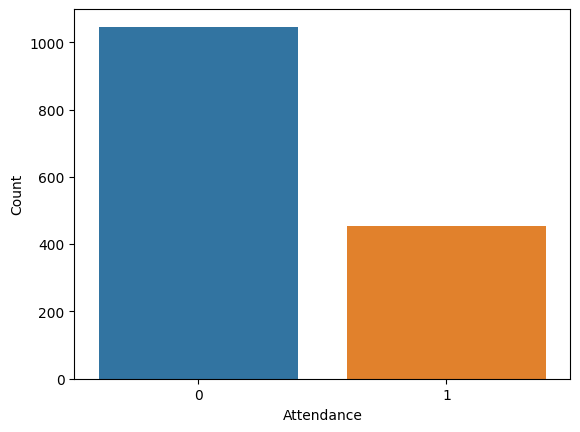

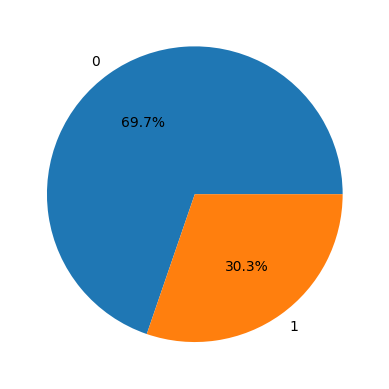

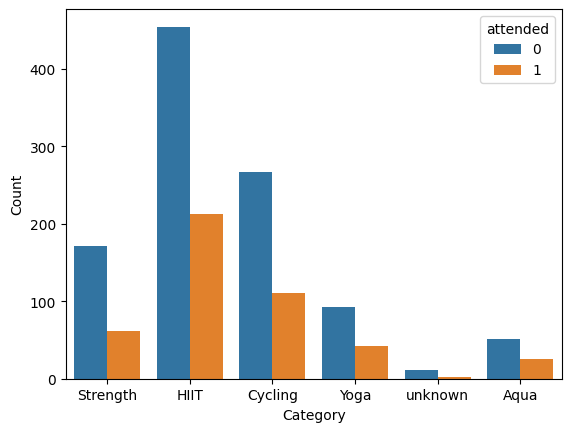

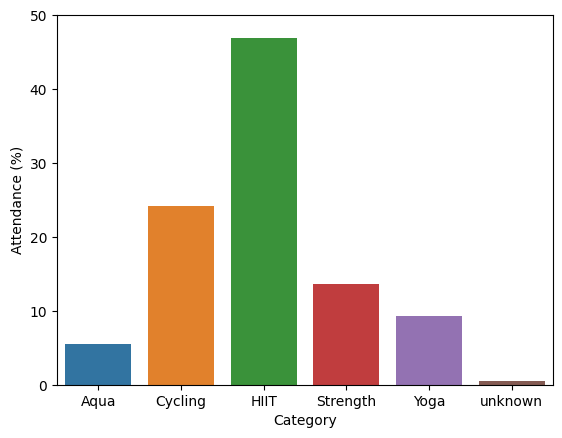

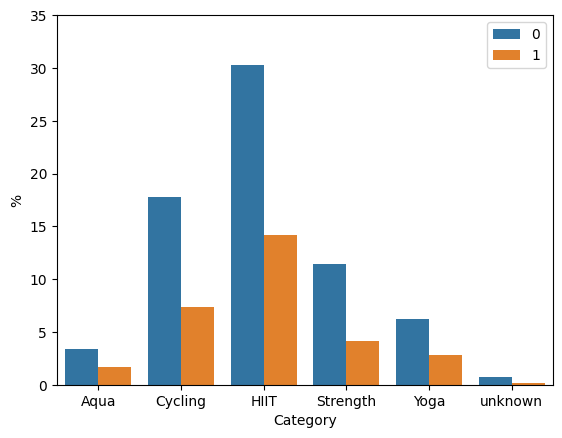

    category  attended  Counts  Percentage
0       Aqua         0      51   67.105263
1       Aqua         1      25   32.894737
2    Cycling         0     266   70.744681
3    Cycling         1     110   29.255319
4       HIIT         0     454   68.065967
5       HIIT         1     213   31.934033
6   Strength         0     171   73.390558
7   Strength         1      62   26.609442
8       Yoga         0      93   68.888889
9       Yoga         1      42   31.111111
10   unknown         0      11   84.615385
11   unknown         1       2   15.384615


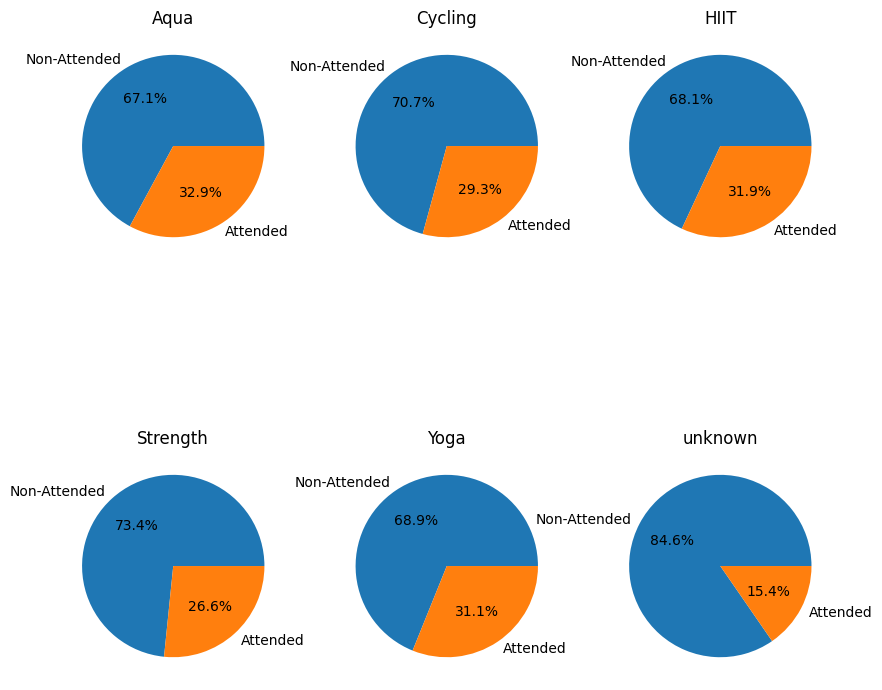

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# count the number of bookings that attended the class (1) and did not attend the class (0)
attended_count = fitness_class['attended'].value_counts()

# create the bar chart
attended_count.plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.xlabel('Attended')
plt.ylabel('Count')
plt.title('Number of Bookings by Attendance')
plt.show()



sns.countplot(x='attended', data=fitness_class)
plt.xlabel('Attendance')
plt.ylabel('Count')
plt.show()

attendance_counts = fitness_class['attended'].value_counts()

plt.pie(attendance_counts, labels=attendance_counts.index,autopct='%1.1f%%')
plt.show()


sns.countplot(x='category', hue='attended', data=fitness_class)
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()



# group the data by category and attended
grouped_data = fitness_class.groupby(['category', 'attended']).size()

# calculate the percentage of observations in each group
attendance_counts = grouped_data[:,1]
attendance_counts_pct = attendance_counts / attendance_counts.sum() * 100

# create a bar plot to display the results
sns.barplot(x=attendance_counts_pct.index, y=attendance_counts_pct.values)
plt.xlabel('Category')
plt.ylabel('Attendance (%)')
plt.ylim(0,50)
plt.show()




# group the data by category and attended
grouped_data = fitness_class.groupby(['category', 'attended']).size()

# calculate the percentage of observations in each group
attendance_counts_pct = grouped_data / grouped_data.sum() * 100

# create a bar plot to display the results
sns.barplot(x=attendance_counts_pct.index.get_level_values(0), y=attendance_counts_pct.values, hue = attendance_counts_pct.index.get_level_values(1))
plt.xlabel('Category')
plt.ylabel('%')
plt.ylim(0,35)
plt.legend()
plt.show()

grouped_data = fitness_class.groupby(['category', 'attended']).size().reset_index(name = "Counts")
grouped_data["Percentage"] = grouped_data.groupby("category")["Counts"].apply(lambda x: x/x.sum()*100)
print(grouped_data)



# Create a new dataframe that contains the count of attended and non-attended for each category
attendance_count = fitness_class.groupby(["category", "attended"]).size().reset_index(name="count")

# Set the number of rows and columns for the subplots
nrows = 2
ncols = 3

# Create the figure and axes for the subplots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))

# Flatten the axes array to make it easier to iterate through
axs = axs.ravel()

# Iterate through each category
for i, category in enumerate(attendance_count["category"].unique()):
    # Get the data for the current category
    category_data = attendance_count[attendance_count["category"] == category]
    
    # Get the counts for attended and non-attended
    attended_count = category_data[category_data["attended"] == 1]["count"].values[0]
    non_attended_count = category_data[category_data["attended"] == 0]["count"].values[0]
    
    # Create the pie chart
    axs[i].pie([non_attended_count, attended_count], labels=["Non-Attended", "Attended"], autopct='%1.1f%%')
    axs[i].set_title(category)

# Show the figure
plt.show()

## Task 3
**Describe the distribution of the number of months as a member. Your answer must include a visualization that shows the distribution.**

- The distribution is not symetrical (see histogram and ECDF -empirical cumulative distribution function-) and a kurtosis of 16.87.
- The distribution is **highly _right_ skewed**, because it has an skewness value of 3.13 (positive skewed).

To evaluate the skewness and symmetry of the distribution, I used the skew and kurtosis functions in Python.

skewness values:

If the skewness is between -0.5 and 0.5, the distribution is approximately symmetrical. If the skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If the skewness is less than -1 or greater than 1, the distribution is highly skewed.

kurtosis values:

If the kurtosis is between -2 and 2, the distribution is approximately symmetrical. If the kurtosis is less than -2 or greater than 2, the distribution is skewed.


![image-8](image-8.png)

![image-10](image-10.png)


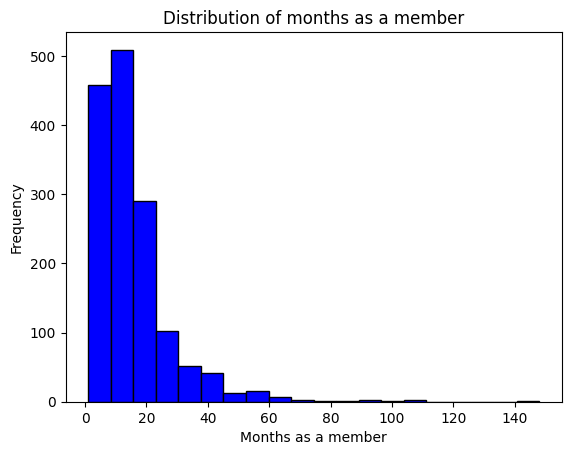

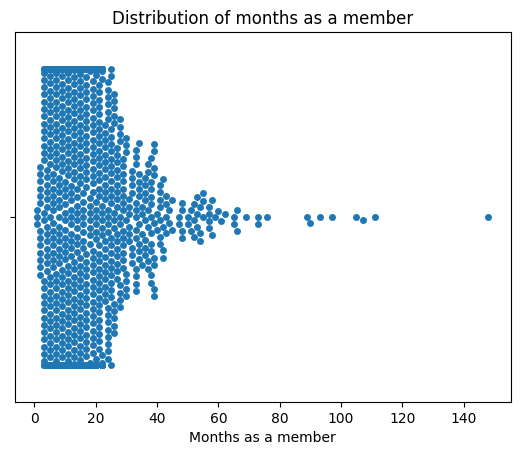

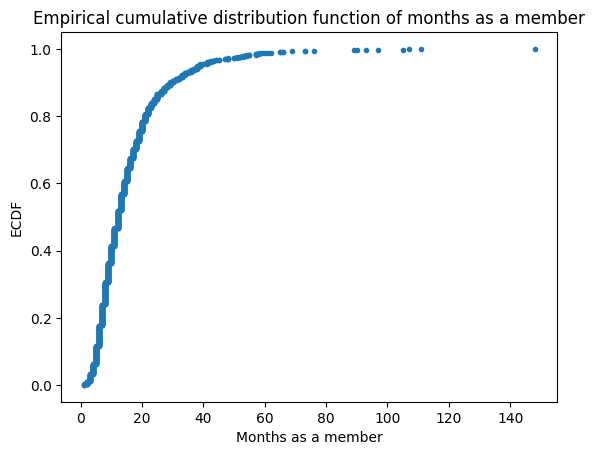

3.136641126368661
16.869766750705352


In [38]:
# Plot a histogram of the number of months as a member
plt.hist(fitness_class["months_as_member"], bins=20, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel("Months as a member")
plt.ylabel("Frequency")
plt.title("Distribution of months as a member")

# Show the plot
plt.show()

# Create a bee swarm plot of the number of months as a member
sns.swarmplot(x=fitness_class["months_as_member"])

# Add labels and title
plt.xlabel("Months as a member")
plt.ylabel("")
plt.title("Distribution of months as a member")

# Show the plot
plt.show()



# Get the data for the "months_as_member" column
data = fitness_class["months_as_member"]

# Get the x and y values for the ECDF
x = np.sort(data)
y = np.arange(1, len(x)+1) / len(x)

# Plot the ECDF
plt.plot(x, y, marker='.', linestyle='none')

# Add labels and title
plt.xlabel("Months as a member")
plt.ylabel("ECDF")
plt.title("Empirical cumulative distribution function of months as a member")

# Show the plot
plt.show()


from scipy.stats import skew, kurtosis

# Calculate skewness
skewness = skew(fitness_class["months_as_member"])
print(skewness)

# Calculate symmetry
symmetry = kurtosis(fitness_class["months_as_member"])
print(symmetry)

## Task 4
**Describe the relationship between attendance and number of months as a member. Your answer must include a visualization to demonstrate the relationship.**

From the table and the next figures it can be shown that:

- The non-attendance (value 0) distribution has a median and mean wich are less than the attendance (value 1) distribution.
- Most of the people that book a class and dont go to the class (value 0) have between **7 and 14 months as members (25,75th percentile)**.
- Most of the people that book a class and go to the class (value 1) have **more than 14 months as members (25th percentile).**
- After 60 months as a member there is a high probability the person will go to the booked class.
- The non-attendance distribution is more concentrated at the begining of "months as a member" variable, wich means its more affected at the begining of "months ad member", meanwhile the distribution attendance is more concentrated after 14 months of being a member.


|   | count  |       mean |        std |  min |   25% |   50% |    75% |    max |
|---|-------|-----------|-----------|-------|-------|-------|-------|-------|
|attended = 0 | 1046.0 |  11.495220 |   7.171546 |  1.0 |   7.0 |  10.0 |  14.00 |   57.0 |
|attended = 1 | 454.0 |  25.151982 |  17.433856 |  4.0 |  14.0 |  20.0 |  29.75 |  148.0 |



![image-12](image-12.png)

![image-13](image-13.png)

![image-14](image-14.png)

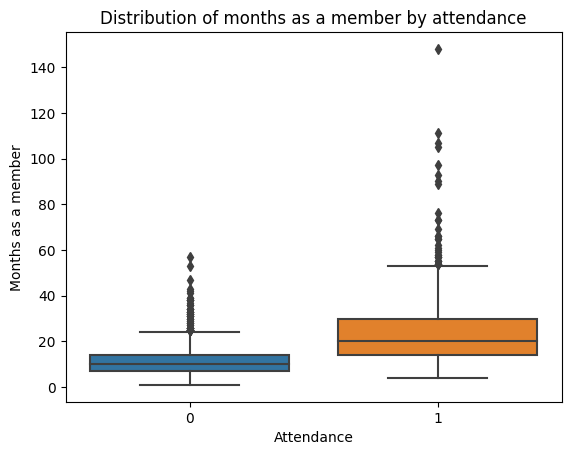

           count       mean        std  min   25%   50%    75%    max
attended                                                             
0         1046.0  11.495220   7.171546  1.0   7.0  10.0  14.00   57.0
1          454.0  25.151982  17.433856  4.0  14.0  20.0  29.75  148.0


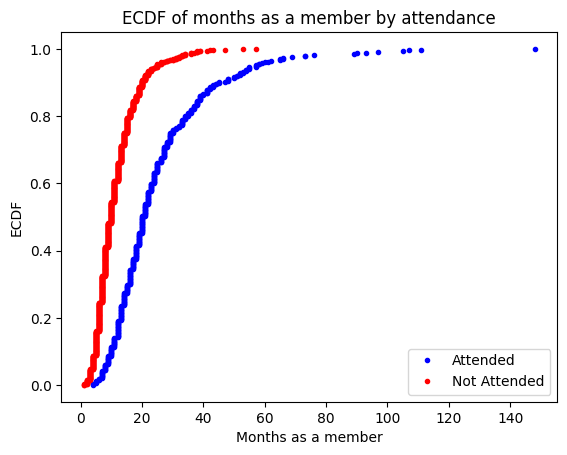

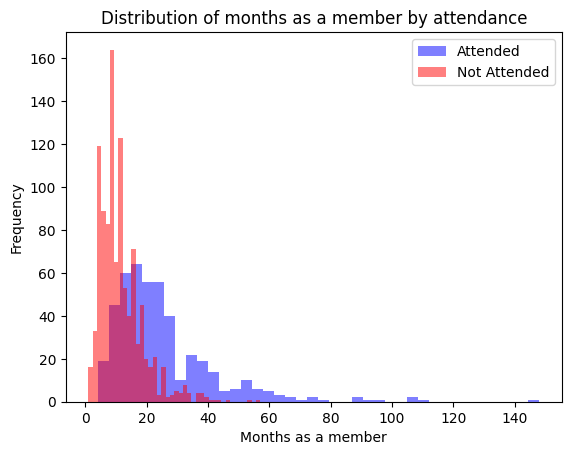

In [39]:
# create the box plot
sns.boxplot(x="attended", y="months_as_member", data=fitness_class)

# Add labels and title
plt.xlabel("Attendance")
plt.ylabel("Months as a member")
plt.title("Distribution of months as a member by attendance")

# Show the plot
plt.show()




# Group the dataframe by the "attended" column
grouped_df = fitness_class.groupby("attended")

# Use the describe() method to see the summary statistics of the "months_as_member" column for each group
print(grouped_df["months_as_member"].describe())





def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


# Group the dataframe by the "attended" column
grouped_df = fitness_class.groupby("attended")

# Get the "months_as_member" column for each group
months_attended = grouped_df["months_as_member"].get_group(1)
months_not_attended = grouped_df["months_as_member"].get_group(0)

# Compute ECDF for each group
x_attended, y_attended = ecdf(months_attended)
x_not_attended, y_not_attended = ecdf(months_not_attended)

# Plot the ECDFs
plt.plot(x_attended, y_attended, marker='.', linestyle='none', color='blue',label='Attended')
plt.plot(x_not_attended, y_not_attended, marker='.', linestyle='none', color='red',label='Not Attended')

# Add labels and title
plt.xlabel("Months as a member")
plt.ylabel("ECDF")
plt.title("ECDF of months as a member by attendance")
plt.legend()
# Show the plot
plt.show()




# Group the dataframe by the "attended" column
grouped_df = fitness_class.groupby("attended")

# Get the "months_as_member" column for each group
months_attended = grouped_df["months_as_member"].get_group(1)
months_not_attended = grouped_df["months_as_member"].get_group(0)

# Plot the histograms
plt.hist(months_attended, bins=40, alpha=0.5, color='blue',label='Attended')
plt.hist(months_not_attended, bins=40, alpha=0.5, color='red',label='Not Attended')

# Add labels and title
plt.xlabel("Months as a member")
plt.ylabel("Frequency")
plt.title("Distribution of months as a member by attendance")
plt.legend()
# Show the plot
plt.show()



## Task 5
**The business wants to predict whether members will attend using the data provided. State the type of machine learning problem that this is (regression/ classification/clustering).**

This is a **classification problem**. The goal is to predict whether a member will attend a class based on the provided data. **The output variable "attended" is binary (1 or 0), which means it belongs to a specific class**. Therefore, the model will have to predict one of two possible classes (attended or not attended) based on the input variables provided.

## Task 6
**Fit a baseline model to predict whether members will attend using the data provided. You must include your code.**

This code uses the **Logistic Regression model** to predict whether members will attend a fitness class using the data provided in the data frame called "fitness_class".

The first step is to replace any "unknown" values in the data frame with NaN. Next, the input features and target variable are separated, where the input features are all columns except "attended" and the target variable is the "attended" column.

The categorical variables in the data frame "day_of_week", "time" and "category" are then one-hot-encoded using the OneHotEncoder class from sklearn. One-hot-encoding is a method of converting categorical variables into numerical variables that can be used in machine learning models.

The data is then split into train and test sets using the train_test_split function from sklearn.model_selection and aplying the Hold-out method with 60% of the data for training and 40% for testing. The Logistic Regression model is then fitted on the training data, and predictions are made on the test data.

In [40]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

# replace "unknown" values with NaN
fitness_class = fitness_class.replace("unknown", np.nan)

# Separate the input features and target variable
X = fitness_class.drop(columns=["attended"])
y = fitness_class["attended"]

# One-hot-encode the categorical variables
ohe = OneHotEncoder(sparse=False)
categorical_cols = ["day_of_week", "time", "category"]
X = pd.concat([X, pd.DataFrame(ohe.fit_transform(X[categorical_cols]), columns=ohe.get_feature_names(categorical_cols))], axis=1)
X = X.drop(columns=categorical_cols)

# Split the data into train and test sets
X_train, X_test, y_train, y_test_1 = train_test_split(X, y, test_size=0.4, random_state=24)

# Fit the model on the train data
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_1 = clf.predict(X_test)

## Task 7
**Fit a comparison model to predict whether members will attend using the data provided. You must include your code.**

This code uses the **HistGradientBoostingClassifier** to predict whether members will attend a fitness class using the data provided in the data frame called "fitness_class".

It begins by replacing any "unknown" values in the "fitness_class" dataframe with NaN. It then separates the input features and target variable by dropping the "attended" column from the input features (X) and setting the "attended" column as the target variable (y).

Next, it uses the OneHotEncoder to one-hot-encode the categorical variables "day_of_week", "time", and "category". It then concatenates the one-hot-encoded dataframe with the original dataframe, dropping the original categorical columns.

The data is then split into train and test sets using the train_test_split function from sklearn.model_selection and aplying the Hold-out method with 60% of the data for training and 40% for testing. The HistGradientBoostingClassifier is then fit on the training data and predictions are made on the test data.

In [41]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

# Drop "unknown" values
fitness_class = fitness_class.replace("unknown", np.nan)

# Separate the input features and target variable
X = fitness_class.drop(columns=["attended"])
y = fitness_class["attended"]

# One-hot-encode the categorical variables
ohe = OneHotEncoder(sparse=False)
categorical_cols = ["day_of_week", "time", "category"]
X = pd.concat([X, pd.DataFrame(ohe.fit_transform(X[categorical_cols]), columns=ohe.get_feature_names(categorical_cols))], axis=1)
X = X.drop(columns=categorical_cols)

# Split the data into train and test sets
X_train, X_test, y_train, y_test_2 = train_test_split(X, y, test_size=0.4, random_state=24)

# Fit the model on the train data
clf = HistGradientBoostingClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_2 = clf.predict(X_test)

## Task 8
**Explain why you chose the two models used in parts 6 and 7.**

There are many machine learning algorithms that can be used to solve a classification problem, next I give the two models that I chose for this problem and the list of reasons as to why.

**Logistic regression**

A logistic regression is a good method to use to predict whether members will attend using the data provided because it is a type of generalized linear model (GLM) that is commonly used for binary classification problems. It models the relationship between a binary dependent variable and one or more independent variables by fitting a logistic curve to the data. This curve is used to predict the probability of the dependent variable being a certain class, which can then be converted into a binary prediction using a threshold. Logistic regression has several advantages, including:

- It is easy to implement and interpret: the coefficients of the model can be used to understand the effect of each independent variable on the probability of the dependent variable being in a certain class.

- It is efficient: logistic regression can handle large datasets and can be used for datasets with a large number of features.

- It can handle non-linear relationships: logistic regression can handle non-linear relationships between the independent and dependent variables by introducing interaction terms or polynomial terms.

- It can handle categorical variables: logistic regression can handle categorical variables by converting them into binary variables through one-hot-encoding before fitting the model.

- It can handle missing data: logistic regression can handle missing data by using Maximum Likelihood Estimation (MLE) instead of using the complete dataset.


**HistGradientBoostingClassifier**

HistGradientBoostingClassifier is a gradient boosting method which is an ensemble learning technique that builds a model by combining the outputs of several simpler models. This allows the model to be more robust and less prone to overfitting.

- The model is able to handle missing values, categorical variables and numerical variables seamlessly.

- It is able to handle imbalanced datasets well, which is a common problem in classification problems.

- It can also be used for regression problems and it performs well in both cases

- This method uses multiple decision trees and combines their outputs to make a final prediction, which helps to improve the accuracy of the model.

- The model can be fine-tuned with various parameters to optimize the performance.

- It is computationally efficient, making it suitable for large datasets and real-time applications.

- It is able to learn non-linear relationships between features and target variable.

- It is considered a powerful method for classification and regression problems, especially when the data is large and complex.

## Task 9
**Compare the performance of the two models used in parts 6 and 7, using any method suitable. You must include your code**

The models will be evaluated in terms of their **Accuracy, Precision and Recall**:

- Accuracy: This metric measures the proportion of correct predictions made by the model compared to the total number of predictions. It is a value between 0 and 1, where 1 represents perfect accuracy.

- Precision: This metric measures the proportion of true positive predictions made by the model compared to the total number of positive predictions. It is a value between 0 and 1, where 1 represents perfect precision. High precision means that the model has a low number of false positives.

- Recall: This metric measures the proportion of true positive predictions made by the model compared to the total number of actual positive instances. It is a value between 0 and 1, where 1 represents perfect recall. High recall means that the model has a low number of false negatives.

**Performance of the logistic regression model**

The performance of the logistic regression model is evaluated using the metrics accuracy, precision.


- Accuracy: 0.78
- Precision: 0.74
- Recall: 0.42

**Performance of the HistGradientBoostingClassifier model**

The performance of the HistGradientBoostingClassifier model is evaluated using the metrics accuracy, precision.

- Accuracy: 0.75
- Precision: 0.61
- Recall: 0.50

In [43]:
# Evaluate the logistic regression model performance
accuracy_1 = accuracy_score(y_test_1, y_pred_1)
precision_1 = precision_score(y_test_1, y_pred_1)
recall_1 = recall_score(y_test_1, y_pred_1)

print("Accuracy: {:.2f}".format(accuracy_1))
print("Precision: {:.2f}".format(precision_1))
print("Recall: {:.2f}".format(recall_1))


# Evaluate the HistGradientBoostingClassifier model performance
accuracy_2 = accuracy_score(y_test_2, y_pred_2)
precision_2 = precision_score(y_test_2, y_pred_2)
recall_2 = recall_score(y_test_2, y_pred_2)

print("Accuracy: {:.2f}".format(accuracy_2))
print("Precision: {:.2f}".format(precision_2))
print("Recall: {:.2f}".format(recall_2))

Accuracy: 0.78
Precision: 0.74
Recall: 0.42
Accuracy: 0.75
Precision: 0.61
Recall: 0.50


## Task 10
**Explain which model performs better and why.**

In this case, the **logistic regression model has a better performance overall**. The accuracy is higher, meaning that the model is correctly classifying more instances. The precision is also higher, indicating that the model is making less false positive predictions. The recall is lower than HistGradientBoostingClassifier, meaning that the model is not identifying as many of the positive instances. However, **considering the overall performance, logistic regression is the better model as it has better Accuracy and a better balance of precision and recall**.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam